Let's use a more complicated dataset: cifar100

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Compose

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"PyTorch version: {torch.__version__}")
print(f"Using {device} device.")

PyTorch version: 2.8.0+cu126
Using cpu device.


In [2]:
import matplotlib.pyplot as plt

def show_sample(transform):
    # Cifar10 classes
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    train_dataset = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    images, labels = next(iter(train_dataloader))

    # Translate labels to human readable names
    labels = [classes[label] for label in labels]

    # if images are in RBG
    if images.shape[1] == 3:
        cmap = None
    else:
        cmap = "gray"

    plt.figure(figsize=(10, 10))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[i].permute(1, 2, 0), cmap=cmap)
        plt.title(f"{labels[i]}")
        plt.axis("off")
    plt.show()


Define the transform applied to the input data

100%|██████████| 170M/170M [00:08<00:00, 21.1MB/s]


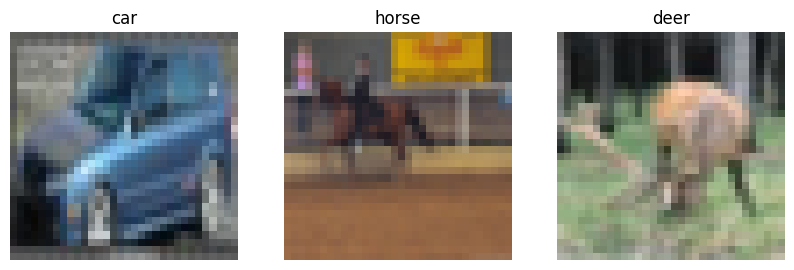

In [3]:
transform = Compose([
    ToTensor()
])

show_sample(transform)

Let's normalize the images to values from -1 to 1. This will cause warnings from matplotlib.

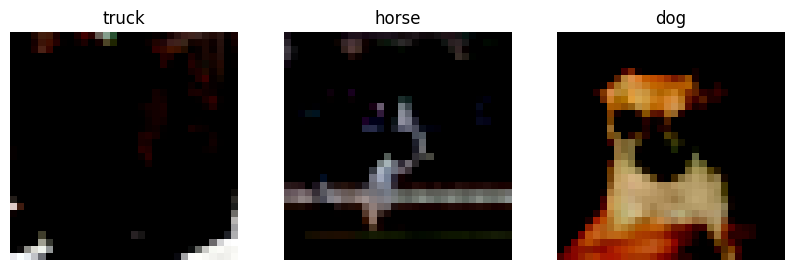

In [4]:
from torchvision.transforms import Normalize

transform = Compose([
    ToTensor(),
    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
show_sample(transform)

We can resize the image. Upscaling low resolution images will result in blurry images. This is usually not a good idea because we are filling the gaps in the image with interpolated data.

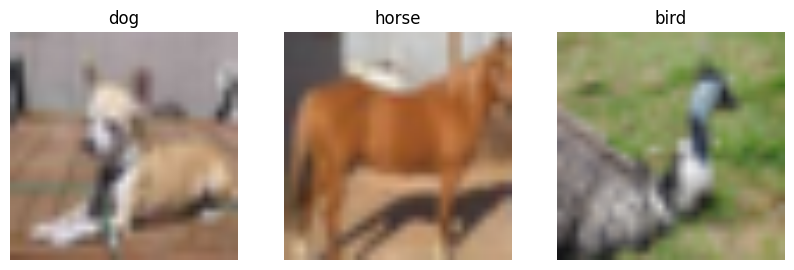

In [5]:
from torchvision.transforms import Resize

transform = Compose([
    Resize((224, 224)),
    ToTensor(),
])
show_sample(transform)

We can eliminate color information by using the Grayscale transform. This will convert the images to grayscale.

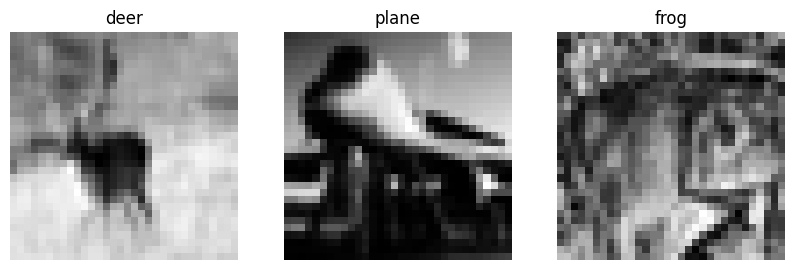

In [6]:
from torchvision.transforms import Grayscale

transform = Compose([
    Grayscale(num_output_channels=1),
    ToTensor(),
])
show_sample(transform)

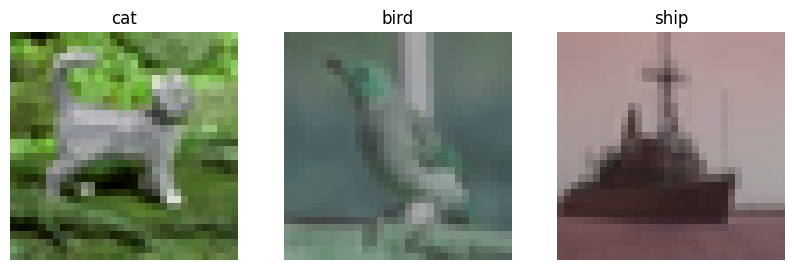

In [7]:
from torchvision.transforms import ColorJitter

transform = Compose([
    ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    ToTensor(),
])
show_sample(transform)